<a href="https://colab.research.google.com/github/preussagnes/mvp-analise-de-dados-e-boas-praticas/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução**

A Lei Seca brasileira (Lei 11.705/08) sancionada em junho de 2008, foi criada com o objetivo de combater a combinação de álcool e direção e consequentemente reduzir os acidentes e as mortes no trânsito das cidades brasileiras. Estabeleceu-se a tolerância zero para o nível de álcool no sangue dos condutores de veículos, permitiu-se a aplicação de testes de alcoolemia, como o bafômetro, e imputou-se penalidades mais severas, incluindo-se multas, suspensão da habilitação e, em casos graves, a criminalização.

Diante desse cenário, este trabalho objetiva avaliar se a implementação da Lei Seca no Brasil reduziu o número de acidentes de trânsito, relacionados ao consumo de álcool.


**Descrição do Dataset**

Para a realização deste trabalho, foi utilizado um dataset disponível no Kaggle, denominado "Brazil Traffic Incidents", que fornece informações sobre acidentes de veículos no Brasil entre os anos de 2007 à 2023. Este está organizado em 18 tabelas no formato CSV, sendo 17 delas dedicadas a dados sobre os acidentes e uma sobre dados dos radares.

Originalmente cada tabela contém entre 26 a 30 atributos, oferecendo uma visão abrangente dos incidentes, incluindo a localização das vias, detalhes dos acidentes, causas, vítimas, entre outros.

No entanto, para este estudo, foram utilizadas apenas as informações das tabelas até o ano de 2022, visto que os dados de 2023 ainda não estavam completos e os dados dos radares foram descartados. Além disso, foram selecionados somente dois atributos e acrescentado mais um novo, que se refere ao ano do acidente, conforme descrito abaixo:

**Dados Categóricos Nominais:**
* Unidade Federativa: : Unidade Federativa que aonde ocorreu o acidente;
* Causa do Acidente: : O motivo do acidente;
* Ano: Ano que ocorreu o acidente.

Os dados dessas colunas são classificados como categóricos nominais, pois representam categorias ou rótulos sem uma ordem ou hierarquia entre elas.

**Carga de Dados**

Para realizar a importação dos dados, o dataset foi armazenado no GitHub e posteriormente, as tabelas referentes aos dados dos acidentes, foram concatenadas em um único DataFrame.

Em seguida, foram feitas algumas alterações. Os nomes das colunas foram modificados para aumentar a legibilidade, as siglas das unidades federativas foram substituídas pelos nomes e foi acrescida a coluna "Ano", cujo tipo, normalmente numérico, foi alterado para string, já que está sendo tratado como uma categoria.

Outra mudança realizada envolveu os campos nulos ou faltantes no dataset. Esses campos estavam definidos como ‘(null)’, então, ao carregá-los no DataFrame, os valores foram convertidos para NaN (Not a Number), permitindo o tratamento adequado posteriormente.

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np

#Tratamento de Missings
import missingno as ms

#Construção de gráficos
import matplotlib.pyplot as plt
#import matplotlib as mlp

#Exibição de dados
from IPython.display import display

# Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Lista dos anos
anos = list(range(2007, 2023))

# Lista para armazenar os DataFrames
dfs = []

# Colunas a serem lidas
colunas = ['uf', 'causa_acidente']

# Caminho base dos arquivos no GitHub
base_url = 'https://github.com/preussagnes/mvp-analise-de-dados-e-boas-praticas/raw/main/DataSet/Dados_PRF_'

# Criar a url do arquivo conforme o ano
for ano in anos:

    url = f"{base_url}{ano}.csv"

    # Ler o dataset, mantendo apenas as colunas desejadas e tratando NaNs
    df = pd.read_csv(url, usecols=colunas, encoding='latin1', delimiter=';', na_values=['(null)'])

    # Renomear as colunas para maior legibilidade
    df.rename(columns={ 'uf': 'Unidade Federativa', 'causa_acidente': 'Causa do Acidente'}, inplace=True)

    # Adicionar a coluna de ano
    df['Ano'] = str(ano)

    # Adicionar o DataFrame à lista
    dfs.append(df)

# Concatenar todos os  em um único DataFrame
df = pd.concat(dfs, ignore_index=True)

In [3]:
# Dicionário que mapeia as siglas para os nomes completos das UFs
uf_dicionario = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
    'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo', 'GO': 'Goiás',
    'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
    'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí',
    'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
    'SE': 'Sergipe', 'TO': 'Tocantins'
}

# Subistituir as siglas pelos nomes completos em cada DataFrame
df['Unidade Federativa'] = df['Unidade Federativa'].replace(uf_dicionario)


**Estatística Descritiva**


Foram executados vários comandos para obter informações sobre as instâncias e atributos do dataset, incluindo informações gerais, estatísticas descritivas e a quantidade de valores nulos no DataFrame.

Ao exibir as primeiras cinco linhas, verificou-se que o dataset foi carregado corretamente, contendo três atributos e 1.981.317 instâncias.

Além disso, por se tratar de dados qualitativos, informações como: mínimo, máximo, mediana, moda, média e desvio-padrão não são relevantes. Porém, as informações retornadas pela estatística descritiva revelam que em 2011 foi o ano com a maior quantidade de acidentes; Minas Gerais é o estado com o maior número de acidentes de trânsito; e que ao longo dos anos a principal causa de acidentes foi a falta de atenção.


Outro ponto observado é a existência de 14 valores NaN (Not a Number), que foram tratados no próximo tópico.


In [4]:
# Informações gerais e estatísticas descritiva dos registros

print('Primeiras 5 linhas:','\n')
df.head(5)

print("Número de linhas e colunas:")
print(df.shape, '\n')

print("Informações gerais:")
print(df.info(), '\n')

print("Estatísticas descritivas:")
print(df.describe(), '\n')

print("Valores nulos por coluna:")
print(df.isnull().sum(),'\n')



Primeiras 5 linhas: 

Número de linhas e colunas:
(1981317, 3) 

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981317 entries, 0 to 1981316
Data columns (total 3 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unidade Federativa  object
 1   Causa do Acidente   object
 2   Ano                 object
dtypes: object(3)
memory usage: 45.3+ MB
None 

Estatísticas descritivas:
       Unidade Federativa Causa do Acidente      Ano
count             1981305           1981315  1981317
unique                 27                95       16
top          Minas Gerais  Falta de atenção     2011
freq               283787            507442   192326 

Valores nulos por coluna:
Unidade Federativa    12
Causa do Acidente      2
Ano                    0
dtype: int64 



Com base nas estatísticas descritivas apresentadas anteriormente, a unidade federativa com a maior quantidade de acidentes foi Minas Gerais. Conforme demonstrado na tabela abaixo, esse estado registrou o maior número de acidentes de trânsito ao longo de todos os anos analisados.

In [5]:
# Tabela com o estado com mais acidentes por ano
tabela_acidentes = df.groupby(['Ano', 'Unidade Federativa']).size().reset_index(name='Total de Acidentes')
estado_mais_acidentes = tabela_acidentes.loc[tabela_acidentes.groupby('Ano')['Total de Acidentes'].idxmax()]

# Exibir a tabela
display(estado_mais_acidentes)


,Ano,Unidade Federativa,Total de Acidentes
12,2007,Minas Gerais,20602
39,2008,Minas Gerais,22711
66,2009,Minas Gerais,25079
93,2010,Minas Gerais,27379
120,2011,Minas Gerais,27429
147,2012,Minas Gerais,26783
174,2013,Minas Gerais,26478
201,2014,Minas Gerais,21884
228,2015,Minas Gerais,15540
255,2016,Minas Gerais,14371


No entanto, ao analisarmos os estados com a maior quantidade de acidentes envolvendo álcool, destacam-se Santa Catarina e Paraná.

In [6]:
# Tabela com o estado com mais acidentes envolvendo álcool por ano
df_alcool = df[df['Causa do Acidente'].str.contains('álcool', case=False, na=False)]
tabela_acidentes_alcool = df_alcool.groupby(['Ano', 'Unidade Federativa']).size().reset_index(name='Acidentes com Álcool')
estado_mais_acidentes_alcool = tabela_acidentes_alcool.loc[tabela_acidentes_alcool.groupby('Ano')['Acidentes com Álcool'].idxmax()]

# Exibir a tabela
display(estado_mais_acidentes_alcool)

,Ano,Unidade Federativa,Acidentes com Álcool
23,2007,Santa Catarina,550
50,2008,Santa Catarina,570
77,2009,Santa Catarina,768
94,2010,Paraná,1097
121,2011,Paraná,1102
158,2012,Santa Catarina,1137
175,2013,Paraná,1130
202,2014,Paraná,1172
229,2015,Paraná,937
266,2016,Santa Catarina,859


Além disso, a principal causa dos acidentes no Brasil não está relacionada ao consumo de álcool. Ao longo dos anos, as causas mais frequentes variaram entre "Outras", "Falta de Atenção", "Falta de Atenção à Condução" e "Reação tardia ou ineficiente do condutor".

In [7]:
# Tabela com a causa do acidente que mais ocrreu por nao
tabela_acidentes_causa = df.groupby(['Ano', 'Causa do Acidente']).size().reset_index(name='Quantidade de Acidentes')
causa_mais_ocorrida = tabela_acidentes_causa.loc[tabela_acidentes_causa.groupby('Ano')['Quantidade de Acidentes'].idxmax()]

# Exibir a tabela
display(causa_mais_ocorrida)

,Ano,Causa do Acidente,Quantidade de Acidentes
8,2007,Outras,45968
19,2008,Outras,49971
30,2009,Outras,55549
38,2010,Falta de atenção,60879
49,2011,Falta de atenção,63526
60,2012,Falta de atenção,61205
71,2013,Falta de atenção,62854
82,2014,Falta de atenção,55089
93,2015,Falta de atenção,36805
104,2016,Falta de atenção,26451


**Tratamento de Missings**

Na visualização matricial da nulidade do DataFrame apresentada abaixo, não há partes brancas aparentes, o que indica que há poucos valores NaN.

<Axes: >

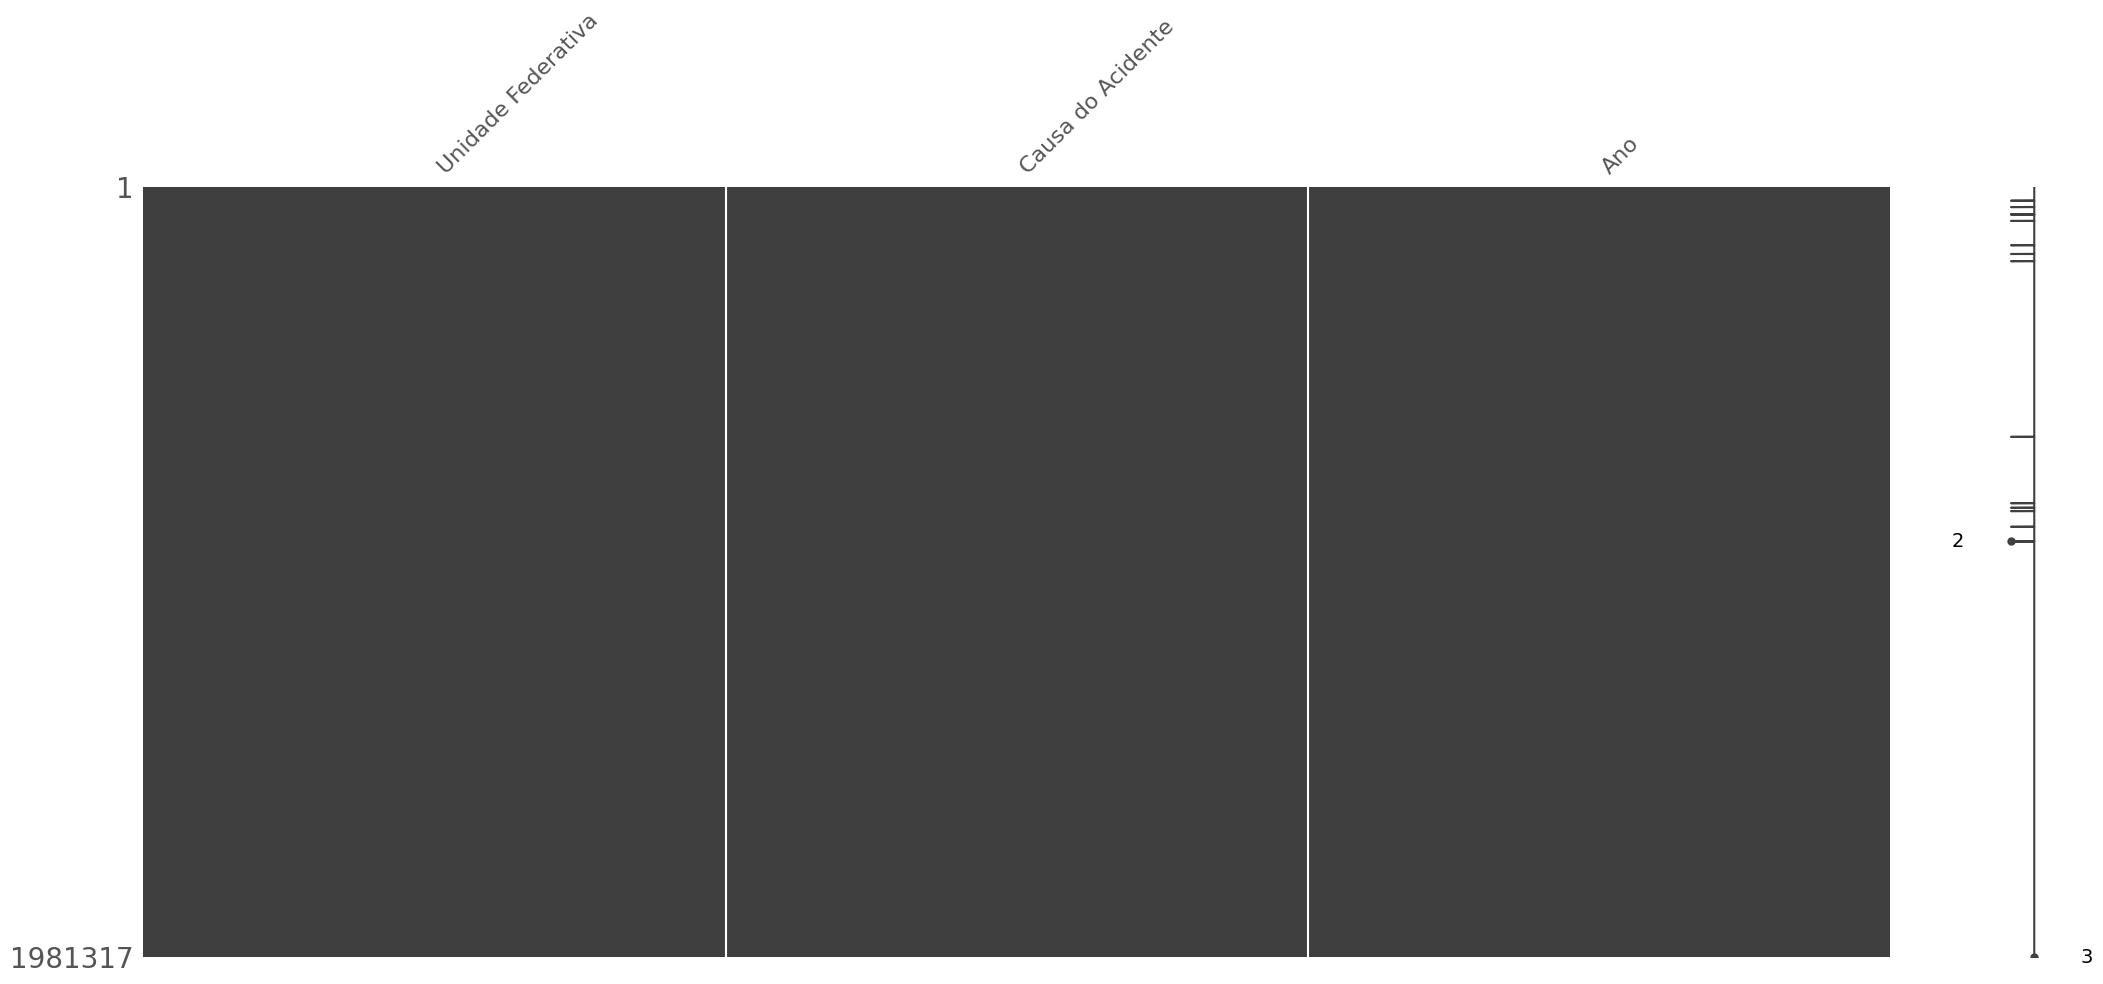

In [19]:
# Exibe a visualização matricial da nulidade do dataset
ms.matrix(df)


Optou-se por excluir as 14 linhas que continham valores NaN, garantindo a integridade dos resultados. Dessa forma, o número de instâncias foi alterado para 1.981.303, o que significa que foram excluídas 14 linhas: 12 devido à falta de preenchimento da Unidade Federativa e 2 devido à ausência da causa do acidente.

In [9]:
#Excluir linhas que contenham algum valor missing
df_sem_missing=df.dropna(how='any')

print("Número de linhas e colunas:")
print(df_sem_missing.shape, '\n')

print("Informações gerais:")
print(df_sem_missing.info(), '\n')

print("Estatísticas descritivas:")
print(df_sem_missing.describe(), '\n')

print("Valores nulos por coluna:")
print(df_sem_missing.isnull().sum())

Número de linhas e colunas:
(1981303, 3) 

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
Index: 1981303 entries, 0 to 1981316
Data columns (total 3 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unidade Federativa  object
 1   Causa do Acidente   object
 2   Ano                 object
dtypes: object(3)
memory usage: 60.5+ MB
None 

Estatísticas descritivas:
       Unidade Federativa Causa do Acidente      Ano
count             1981303           1981303  1981303
unique                 27                95       16
top          Minas Gerais  Falta de atenção     2011
freq               283787            507440   192325 

Valores nulos por coluna:
Unidade Federativa    0
Causa do Acidente     0
Ano                   0
dtype: int64


É importante destacar que na etapa de pré-processamento dos dados, também poderia ser utilizado o one-hot encoding para converter atributos categóricos nominais, como "Unidade Federativa", "Causa do Acidente" e "Ano", em colunas binárias. Essa abordagem seria facilmente interpretada por algoritmos de machine learning, mas, para este exemplo, poderia gerar alta dimensionalidade e dificultar a interpretação dos gráficos.

In [20]:
# Separar o array em componentes de input e output
x = df_sem_missing.values[:,0:2]
y = df_sem_missing.values[:,2]

# One hot encode para os atributos x
encoded_X = OneHotEncoder(sparse=False).fit_transform(x)

# Exibir os dados transformados nas 5 primeiras linhas
print(encoded_X[:5, :])


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 

**Plotagem do Gráfico**

Para a construção dos gráficos abaixo, foram feitas algumas configurações de estilo para alterar a estética dos gráficos, conforme descrito a seguir.

In [10]:
#Define uma cor
azul='#6688AA'

#Carrega uma folha de estilo
plt.style.use("ggplot")

#Modifica parâmetros gráficos
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "f0f0f0")


O gráfico escolhido para exibir a quantidade de acidentes de trânsito no Brasil ao longo do tempo, foi o gráfico de linhas, pois é ideal para representar variáveis que demonstram a passagem do tempo.

Para construí-lo, foi realizada a codificação para gerar um gráfico com duas linhas: a primeira representa o total de acidentes por ano (em azul) e a segunda representa o total de acidentes envolvendo o consumo de álcool (em laranja).

No dataset, a causa dos acidentes que envolvem álcool varia. Portanto, foi feita a contagem a partir do filtro da palavra “álcool”, independentemente de estar em letras maiúsculas ou minúsculas.

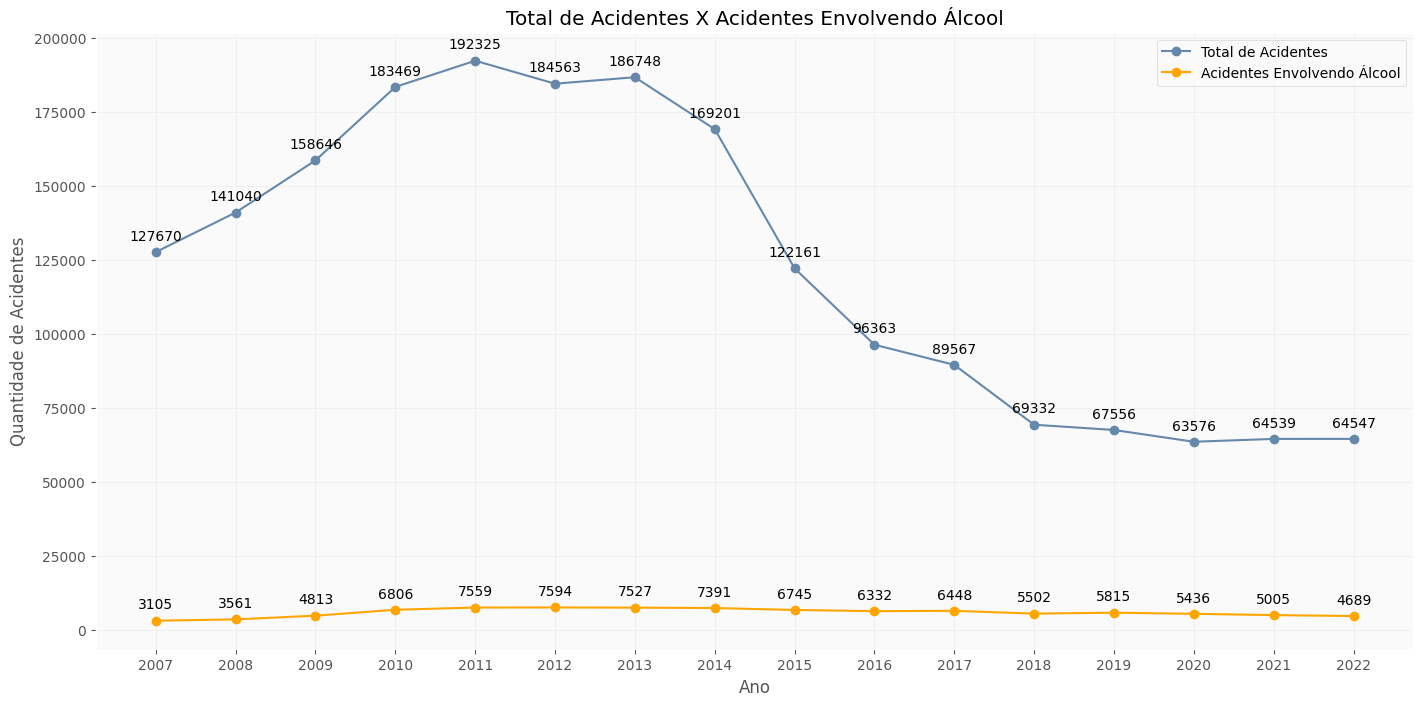

In [15]:
# Contar o total de acidentes e o total de acidentes relacionados ao álcool
df_total = df_sem_missing.groupby('Ano').size().reset_index(name='Total de Acidentes')
df_alcool = df_sem_missing[df_sem_missing['Causa do Acidente'].str.contains('álcool', case=False)]
df_alcool = df_alcool.groupby('Ano').size().reset_index(name='Acidentes com Álcool')

# Juntar as duas tabelas
df_summary = pd.merge(df_total, df_alcool, on='Ano', how='left')

# Converter Ano para numérico para o gráfico
df_summary['Ano'] = pd.to_numeric(df_summary['Ano'])

# Criar o gráfico
plt.figure(figsize=(17, 8))
plt.plot(df_summary['Ano'], df_summary['Total de Acidentes'], label='Total de Acidentes', marker='o', color=azul,)
plt.plot(df_summary['Ano'], df_summary['Acidentes com Álcool'], label='Acidentes Envolvendo Álcool', marker='o', color='orange')

# Adicionar valores no topo das linhas
for i in range(len(df_summary)):
    plt.text(df_summary['Ano'][i], df_summary['Total de Acidentes'][i] + 4000, str(int(df_summary['Total de Acidentes'][i])), ha='center')
    plt.text(df_summary['Ano'][i], df_summary['Acidentes com Álcool'][i] + 4000, str(int(df_summary['Acidentes com Álcool'][i])), ha='center')

# Definir os ticks do eixo X para todos os anos entre 2007 e 2022
plt.xticks(range(2007, 2023, 1))

# Adicionar título e rótulos
plt.title('Total de Acidentes X Acidentes Envolvendo Álcool')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Acidentes')

# Legenda
plt.legend()

# Mostrar o gráfico
plt.show()


No próximo bloco de código, foi construído um gráfico de barras empilhadas, ideal para entender quanto cada grupo contribui para o todo. Nesse caso, buscamos compreender nos acidentes por unidades federativas, qual a quantidade de acidentes relacionada ao consumo de álcool.

Além disso, as unidades federativas foram organizadas em ordem decrescente, ou seja, da que possui mais acidentes enveolvendo álcool para a que possui menos.

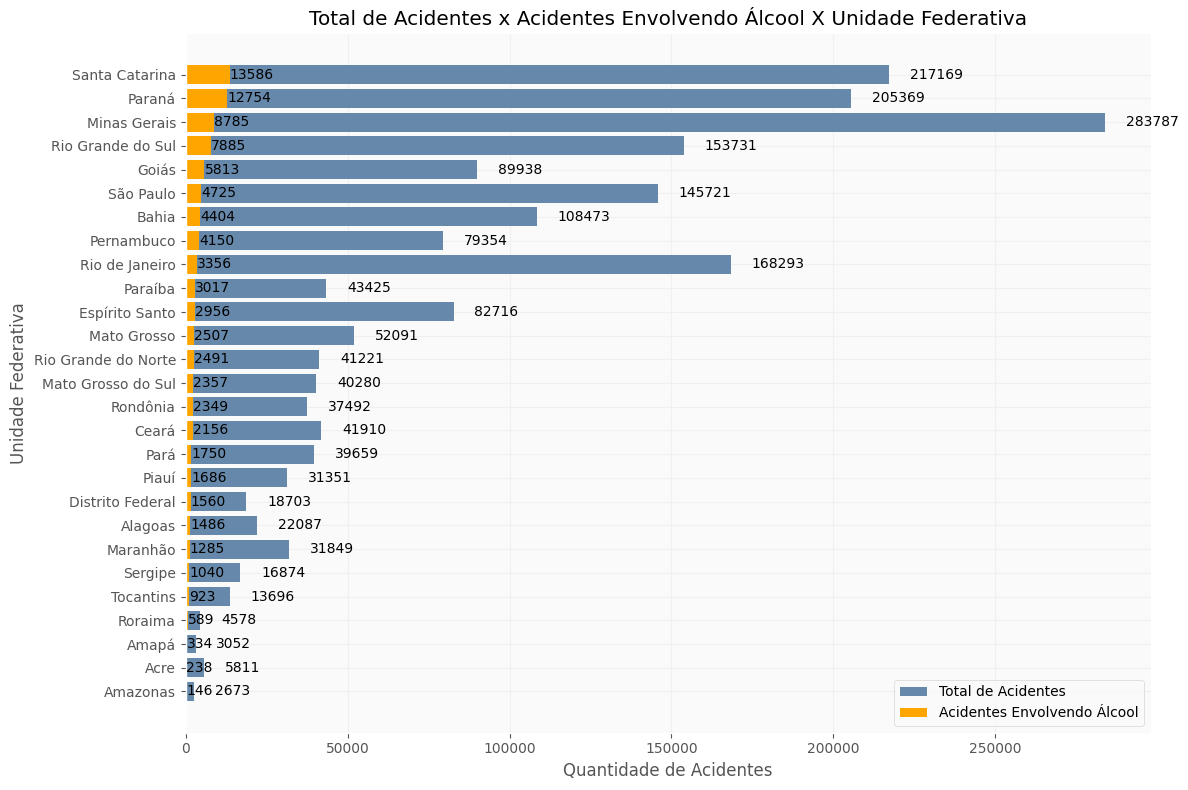

In [12]:
# Contar o total de acidentes e os relacionados ao álcool
df_total = df_sem_missing.groupby('Unidade Federativa').size().reset_index(name='Total de Acidentes')
df_alcool = df_sem_missing[df_sem_missing['Causa do Acidente'].str.contains('álcool', case=False)]
df_alcool = df_alcool.groupby('Unidade Federativa').size().reset_index(name='Acidentes com Álcool')

# Juntar as duas tabelas
df_summary = pd.merge(df_total, df_alcool, on='Unidade Federativa', how='left')

# Ordenar por Acidentes com Álcool em ordem decrescente
df_summary = df_summary.sort_values(by='Acidentes com Álcool', ascending=True)

# Criar o gráfico de barras agrupadas com eixos invertidos
fig, ax = plt.subplots(figsize=(12, 8))

# Definir largura das barras e a posição
index = np.arange(len(df_summary['Unidade Federativa']))

# Barras para Total de Acidentes
bars_total = ax.barh(index, df_summary['Total de Acidentes'], label='Total de Acidentes', color=azul)

# Barras para Acidentes com Álcool
bars_alcool = ax.barh(index, df_summary['Acidentes com Álcool'], label='Acidentes Envolvendo Álcool', color='orange')

# Usar ax.bar_label para adicionar os valores nas barras
ax.bar_label(bars_total, labels=[f'{int(val)}' for val in df_summary['Total de Acidentes']], padding=15)
ax.bar_label(bars_alcool, labels=[f'{int(val)}' for val in df_summary['Acidentes com Álcool']], padding=0)

# Adicionar título e rótulos
ax.set_title('Total de Acidentes x Acidentes Envolvendo Álcool X Unidade Federativa')
ax.set_xlabel('Quantidade de Acidentes')
ax.set_ylabel('Unidade Federativa')
ax.set_yticks(index)
ax.set_yticklabels(df_summary['Unidade Federativa'])

# Colocar a legenda na parte inferior do gráfico
ax.legend(loc='lower right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


No entanto, o fato de uma unidade federativa ter mais acidentes envolvendo álcool não significa que a porcentagem de acidentes com álcool seja a maior comparando ao total de acidentes. Por isso foi elaborado o gráfico abaixo, que exibe a porcentagem de acidentes com álcool em relação ao total de acidentes.

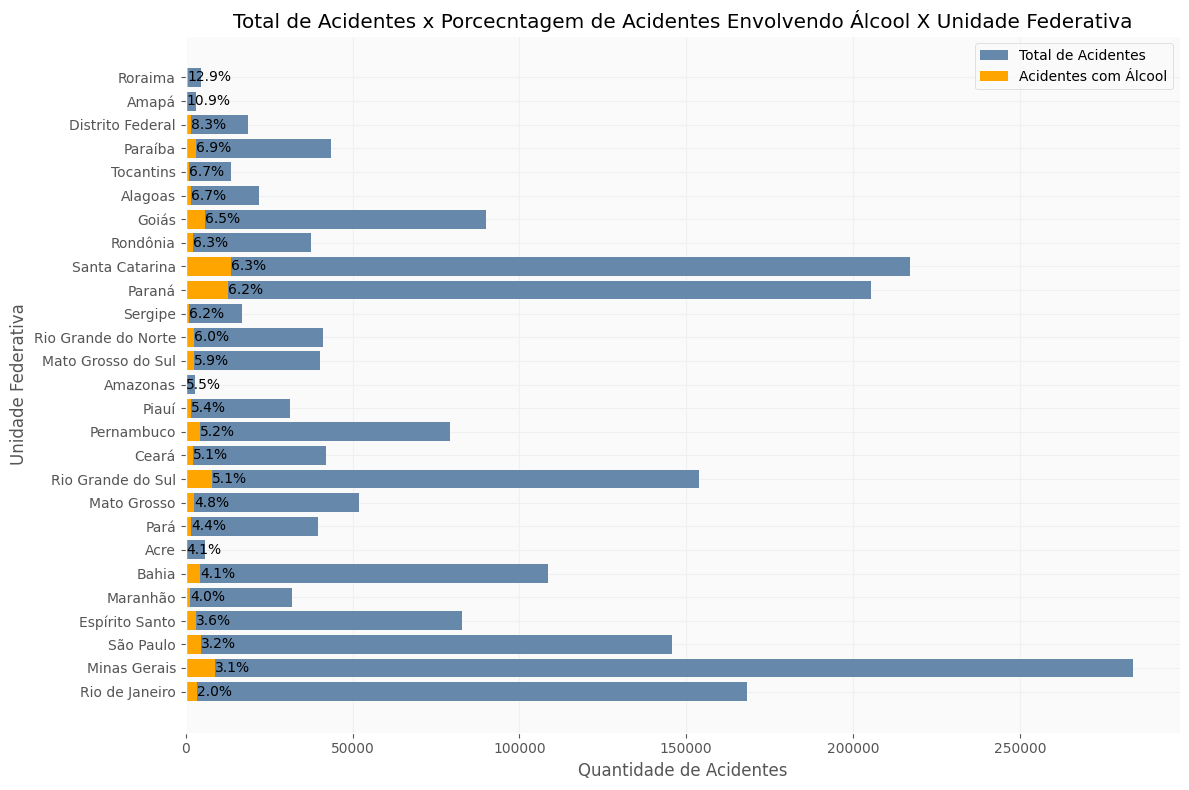

In [17]:
# Contar o total de acidentes e os relacionados ao álcool
df_total = df_sem_missing.groupby('Unidade Federativa').size().reset_index(name='Total de Acidentes')
df_alcool = df_sem_missing[df_sem_missing['Causa do Acidente'].str.contains('álcool', case=False, na=False)]
df_alcool = df_alcool.groupby('Unidade Federativa').size().reset_index(name='Acidentes com Álcool')

# Juntar as duas tabelas
df_summary = pd.merge(df_total, df_alcool, on='Unidade Federativa', how='left')

# Calcular a porcentagem de acidentes com álcool em relação ao total de acidentes
df_summary['Porcentagem Álcool'] = (df_summary['Acidentes com Álcool'] / df_summary['Total de Acidentes']) * 100

# Ordenar por porcentagem de acidentes com álcool em ordem decrescente
df_summary = df_summary.sort_values(by='Porcentagem Álcool', ascending=True)

# Criar o gráfico de barras agrupadas com eixos invertidos
fig, ax = plt.subplots(figsize=(12, 8))

# Definir largura das barras e a posição
index = np.arange(len(df_summary['Unidade Federativa']))

# Barras para Total de Acidentes
bars_total = ax.barh(index, df_summary['Total de Acidentes'], label='Total de Acidentes', color=azul)

# Barras para Acidentes com Álcool
bars_alcool = ax.barh(index, df_summary['Acidentes com Álcool'], label='Acidentes com Álcool', color='orange')

# Usar ax.bar_label para adicionar as porcentagens nas barras de Acidentes com Álcool
ax.bar_label(bars_alcool, labels=[f'{df_summary["Porcentagem Álcool"].iloc[i]:.1f}%' for i in range(len(df_summary))])

# Adicionar título e rótulos
ax.set_title('Total de Acidentes x Porcecntagem de Acidentes Envolvendo Álcool X Unidade Federativa')
ax.set_xlabel('Quantidade de Acidentes')
ax.set_ylabel('Unidade Federativa')
ax.set_yticks(index)
ax.set_yticklabels(df_summary['Unidade Federativa'])

# Adicionar a legenda
ax.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

**Aprendizado de Máquina**

A avaliação sobre se a implementação da Lei Seca no Brasil reduziu o número de acidentes de trânsito relacionados ao consumo de álcool pode ser abordada como um problema de aprendizado supervisionado, no qual um modelo é construído a partir de dados rotulados. Especificamente, trata-se de um problema de regressão, cujo objetivo é prever um valor estimado, ou seja, a quantidade futura de acidentes relacionados ao álcool, com base em dados históricos e variáveis como o ano.






**Conclusão**

Observa-se com base nos gráficos, que a Lei Seca não reduziu a quantidade de acidentes envolvendo o álcool. Entretanto, outras variáveis como a política de carros populares em 2009, que aumentou a quantidade de veículos nas ruas, e o surgimento de aplicativos, que visam burlar as fiscalizações (blitz) da Lei Seca, podem ter influenciado na ausência da redução nos acidentes relacionados ao álcool.

Além disso, o dataset não deixa claro se foram realizados testes de alcoolemia em todos os acidentes de trânsito; assim, não podemos afirmar, por exemplo, que um acidente atribuído à falta de atenção não envolveu álcool.

Outro ponto interessante, embora não seja o foco da análise, é que, apesar da região Sudeste ter muitos acidentes de veículos, com o estado de Minas Gerais sendo o de maior ocorrência, a proporção de acidentes envolvendo álcool é uma das mais baixas, variando entre 2% e 3%. As unidades federativas com mais acidentes envolvendo álcool são, na verdade, as que têm menos acidentes no total.
